In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


In [34]:
data_set = pd.read_csv('Placement_Data_Full_Class.csv')
data_set.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [35]:
data_set.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

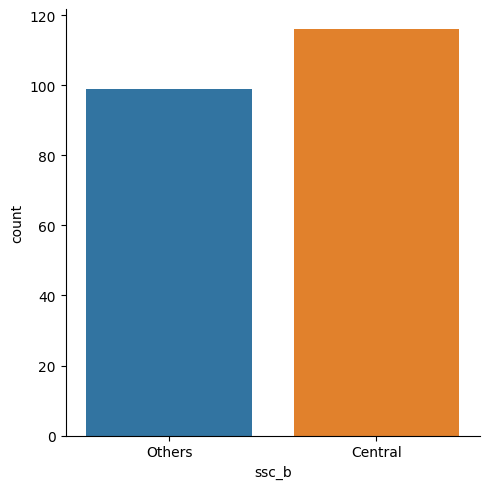

In [36]:
sb.catplot(x='ssc_b', kind='count', data=data_set)

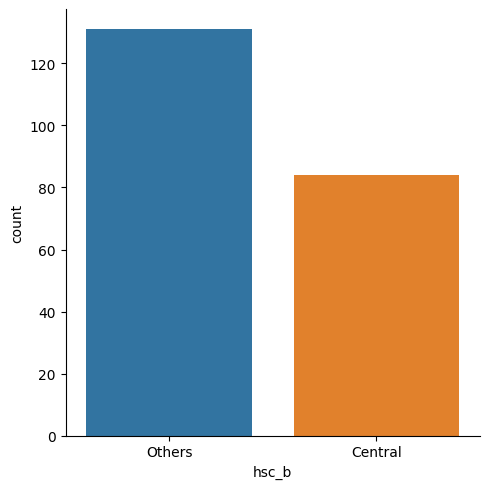

In [37]:
sb.catplot(x='hsc_b', kind='count', data=data_set)

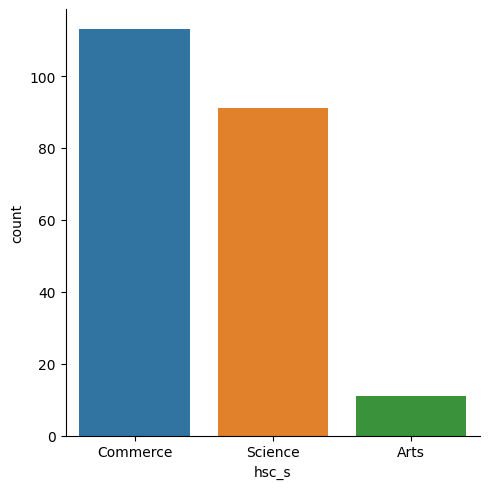

In [38]:
sb.catplot(x='hsc_s', kind='count', data=data_set)

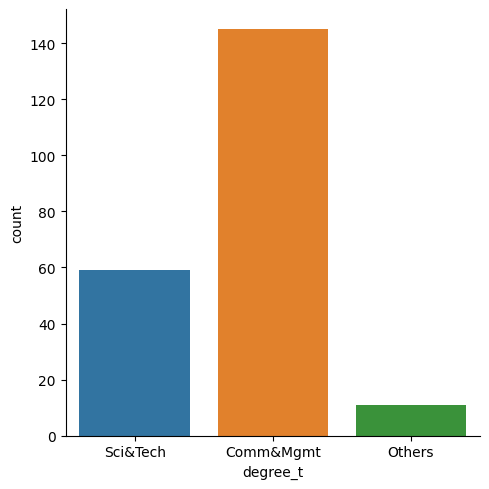

In [39]:
sb.catplot(x='degree_t', kind='count', data=data_set)

In [40]:
data_set['degree_t'].value_counts(normalize=True)

Comm&Mgmt    0.674419
Sci&Tech     0.274419
Others       0.051163
Name: degree_t, dtype: float64

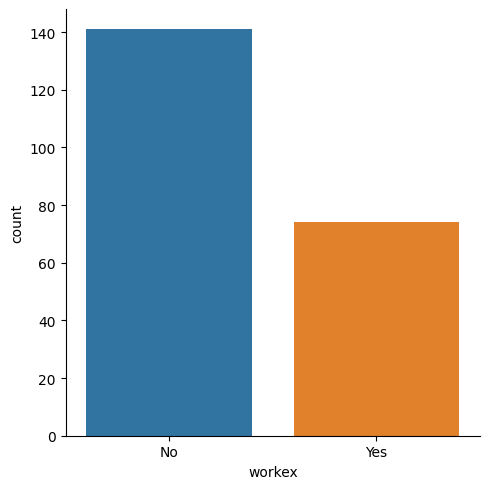

In [41]:
sb.catplot(x='workex', kind='count', data=data_set)

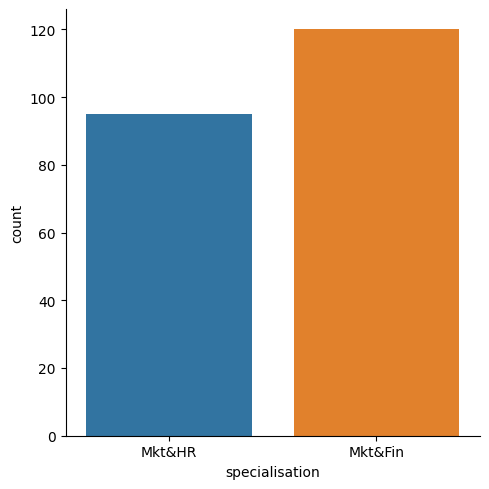

In [42]:
sb.catplot(x='specialisation', kind='count', data=data_set)


In [43]:
data_set.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [45]:
pl_df = data_set.drop(['sl_no', 'salary'], axis=1)
pl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [46]:
pl_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ssc_p,215.0,67.303395,10.827205,40.89,60.600,67.0,75.700,89.40
hsc_p,215.0,66.333163,10.897509,37.00,60.900,65.0,73.000,97.70
degree_p,215.0,66.370186,7.358743,50.00,61.000,66.0,72.000,91.00
etest_p,215.0,72.100558,13.275956,50.00,60.000,71.0,83.500,98.00
mba_p,215.0,62.278186,5.833385,51.21,57.945,62.0,66.255,77.89


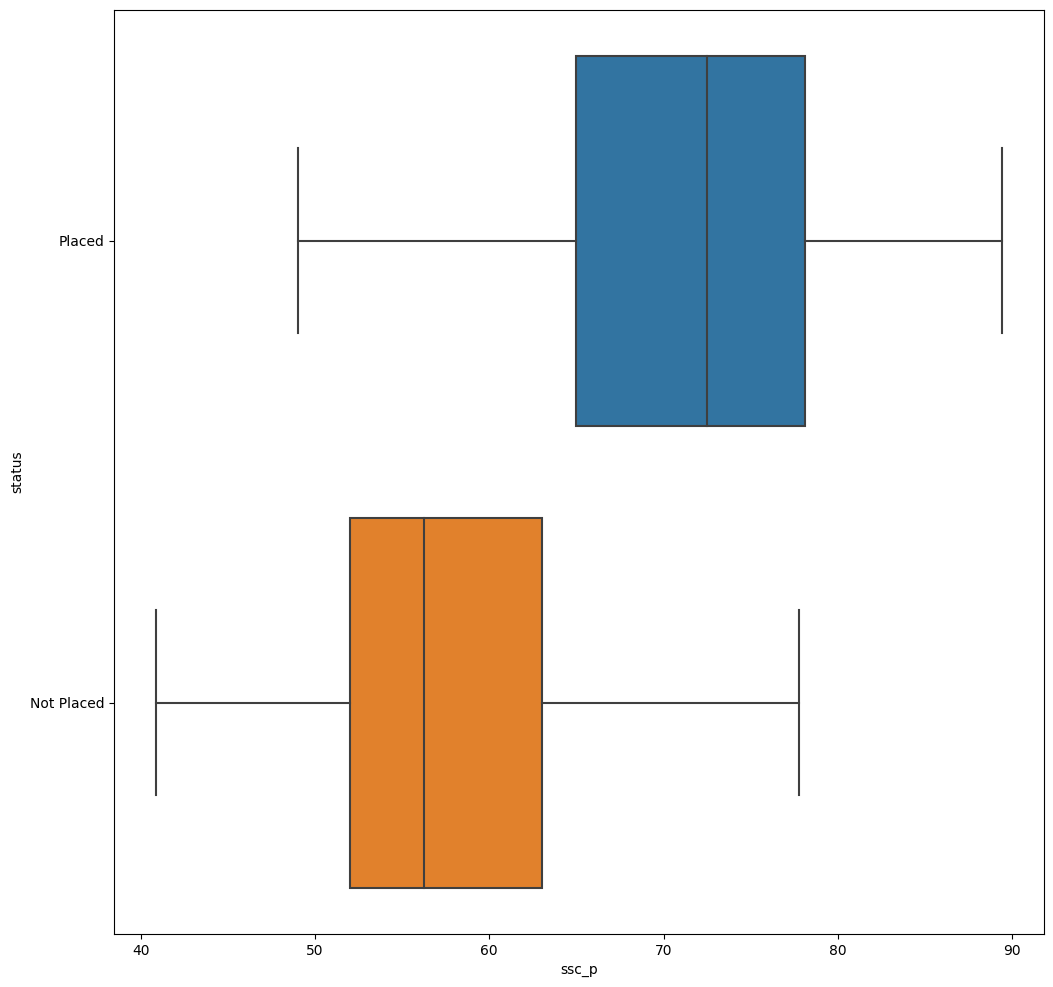

In [47]:
plt.figure(figsize=(12, 12))
box = sb.boxplot(x='ssc_p', y='status', data=pl_df)

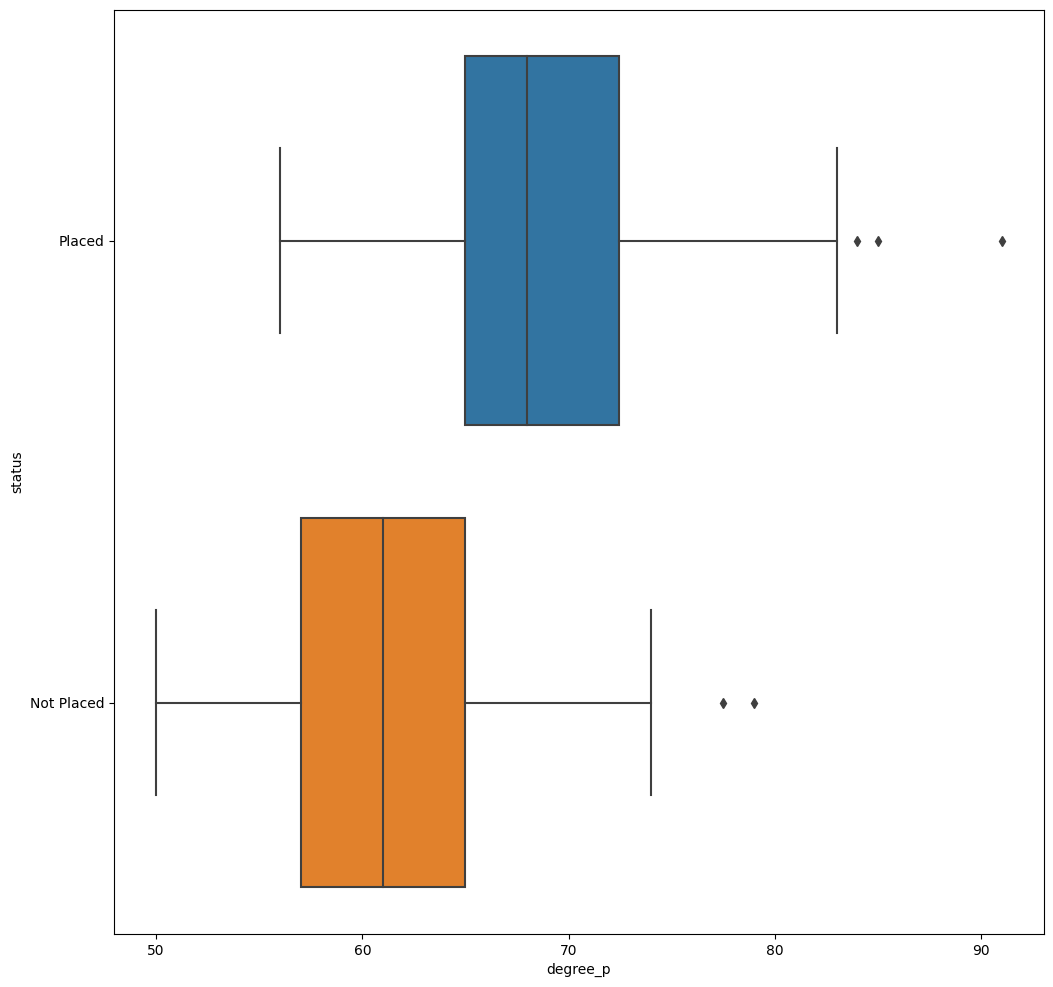

In [48]:
plt.figure(figsize=(12, 12))
box = sb.boxplot(x='degree_p', y='status', data=pl_df)

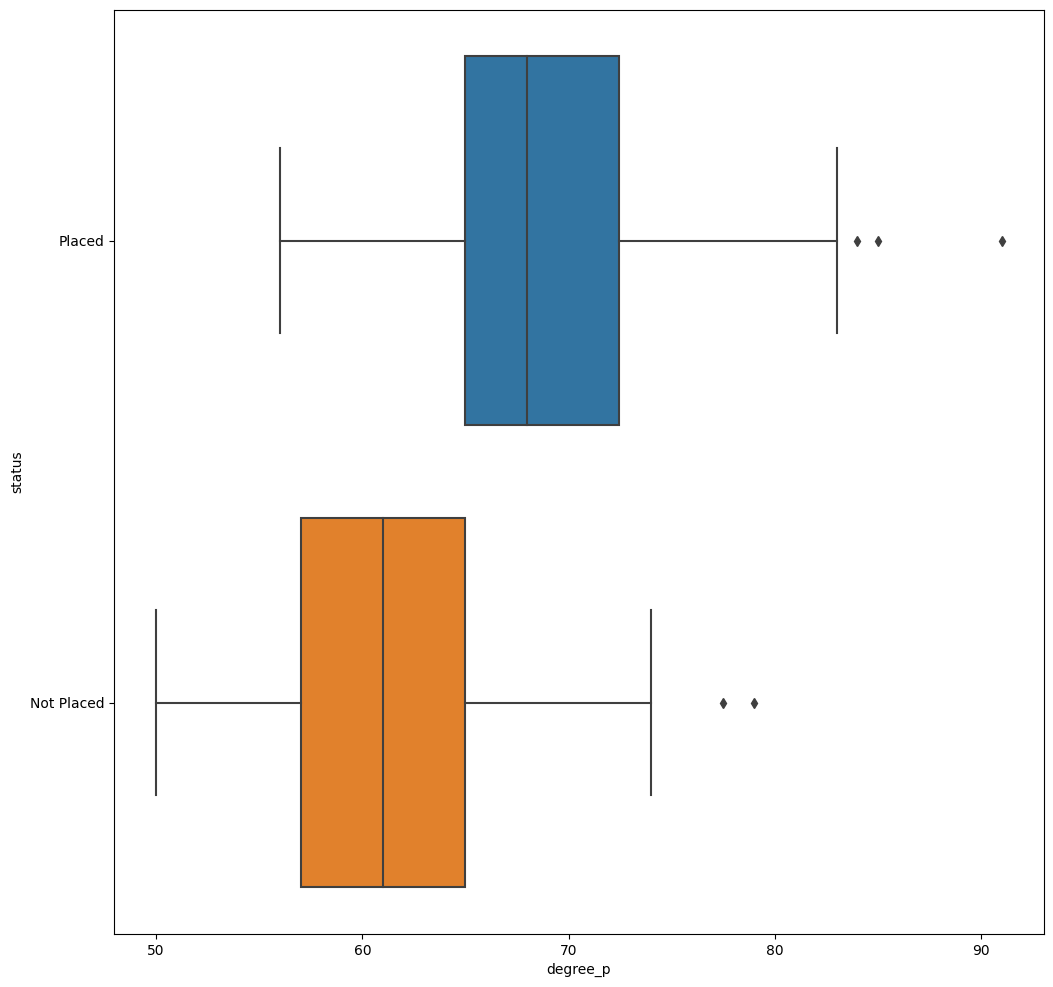

In [49]:
plt.figure(figsize=(12, 12))
box = sb.boxplot(x='degree_p', y='status', data=pl_df)

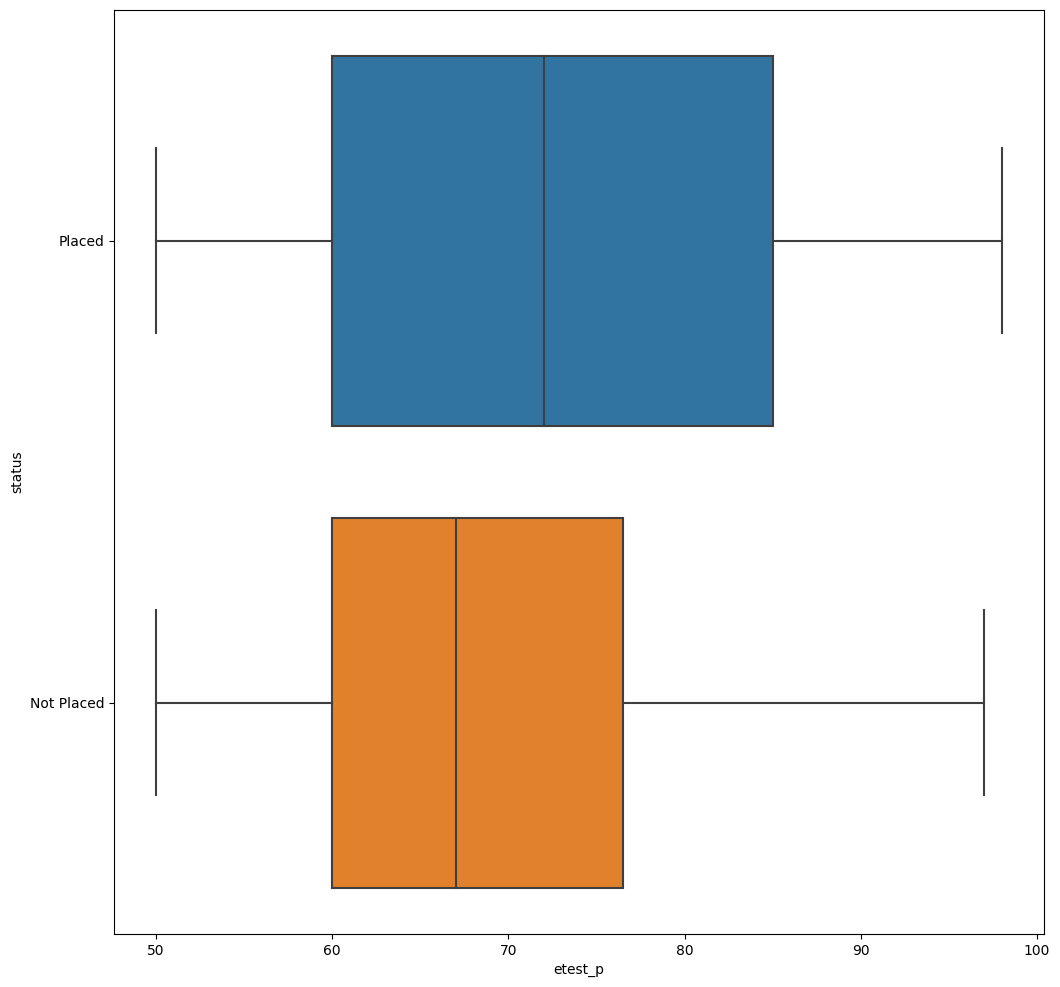

In [50]:
plt.figure(figsize=(12, 12))
box = sb.boxplot(x='etest_p', y='status', data=pl_df)

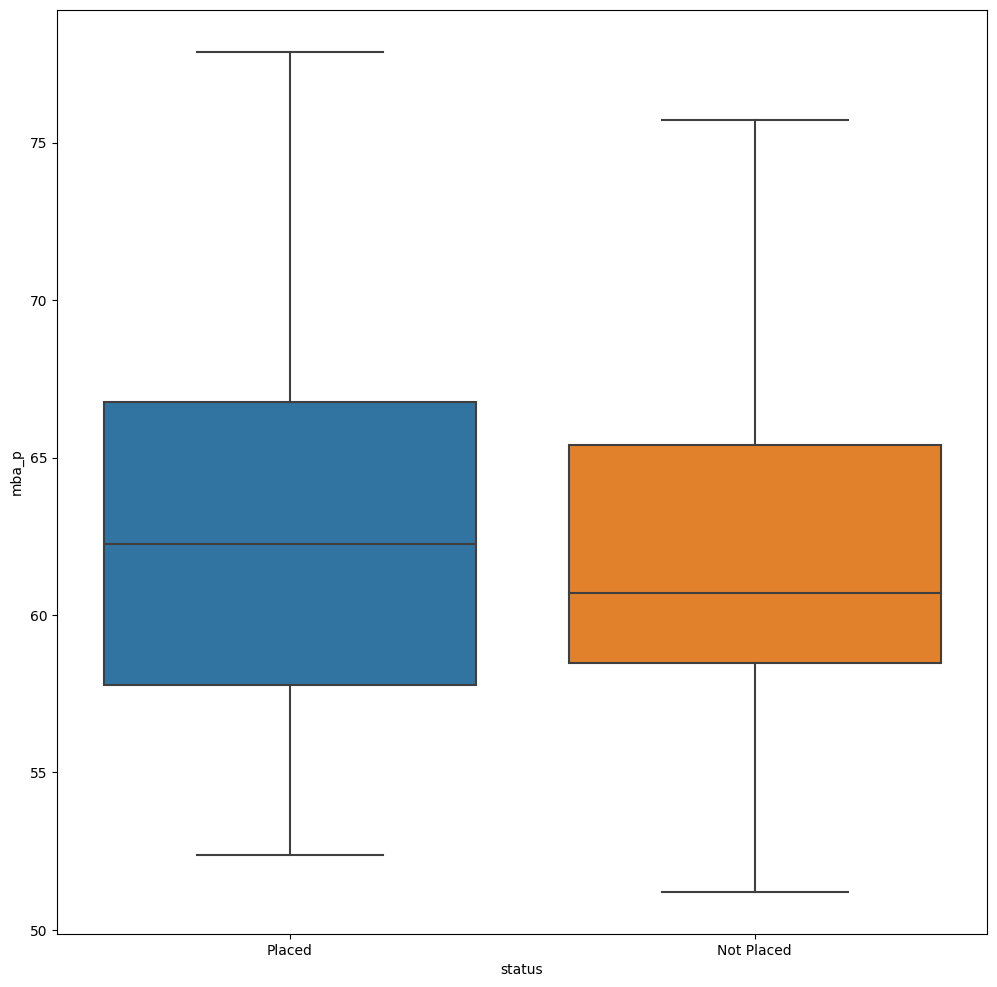

In [51]:
plt.figure(figsize=(12, 12))
box = sb.boxplot(y='mba_p', x='status', data=pl_df)

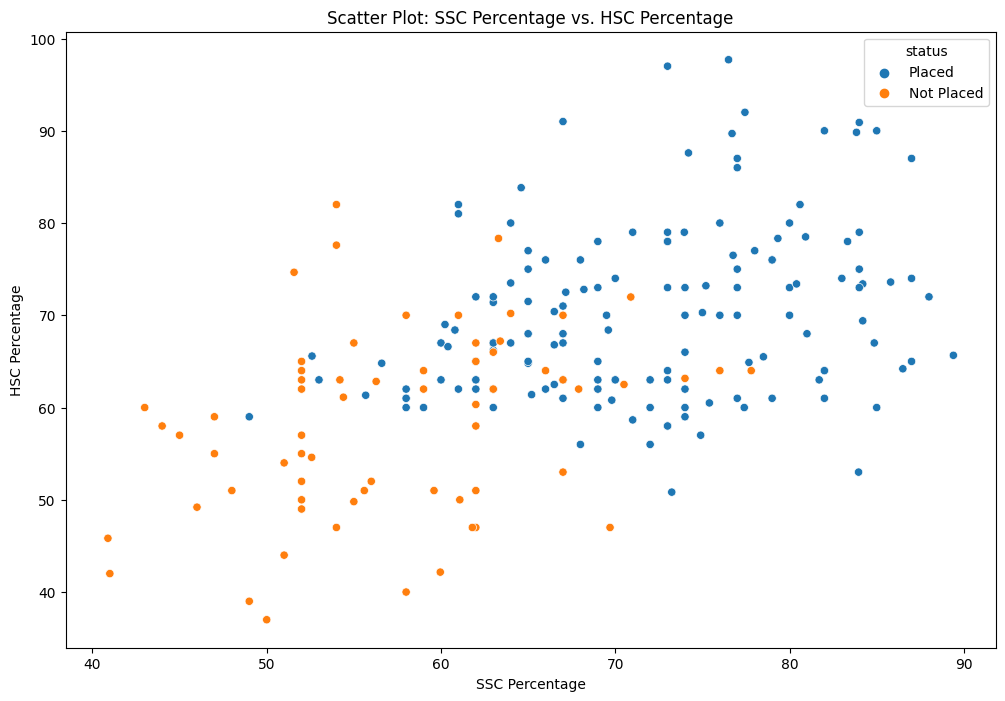

In [52]:
# Scatter plot for 'ssc_p' vs 'hsc_p'
plt.figure(figsize=(12, 8))
sb.scatterplot(x='ssc_p', y='hsc_p', hue='status', data=pl_df)
plt.title('Scatter Plot: SSC Percentage vs. HSC Percentage')
plt.xlabel('SSC Percentage')
plt.ylabel('HSC Percentage')
plt.show()

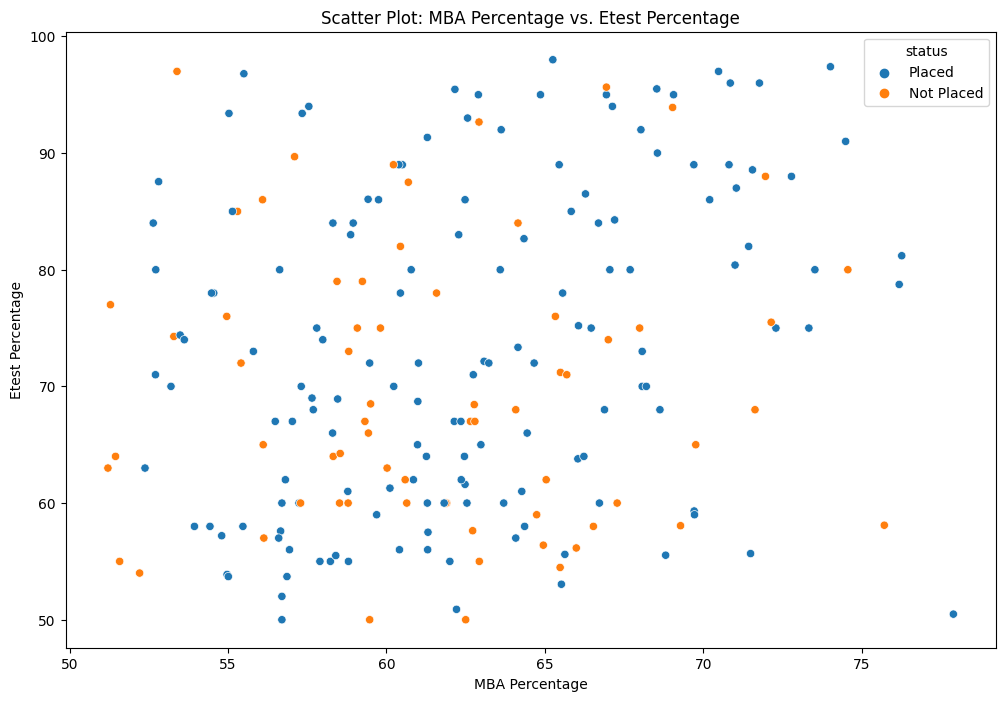

In [53]:
# Scatter plot for 'mba_p' vs 'etest_p'
plt.figure(figsize=(12, 8))
sb.scatterplot(x='mba_p', y='etest_p', hue='status', data=pl_df)
plt.title('Scatter Plot: MBA Percentage vs. Etest Percentage')
plt.xlabel('MBA Percentage')
plt.ylabel('Etest Percentage')
plt.show()

In [55]:
# Encode categorical variables
labels = LabelEncoder()

In [57]:
pl_df['gender'] = labels.fit_transform(pl_df['gender'])
pl_df['ssc_b'] = labels.fit_transform(pl_df['ssc_b'])
pl_df['hsc_b'] = labels.fit_transform(pl_df['hsc_b'])
pl_df['hsc_s'] = labels.fit_transform(pl_df['hsc_s'])
pl_df['degree_t'] = labels.fit_transform(pl_df['degree_t'])
pl_df['workex'] = labels.fit_transform(pl_df['workex'])
pl_df['specialisation'] = labels.fit_transform(pl_df['specialisation'])
pl_df['status'] = labels.fit_transform(pl_df['status'])

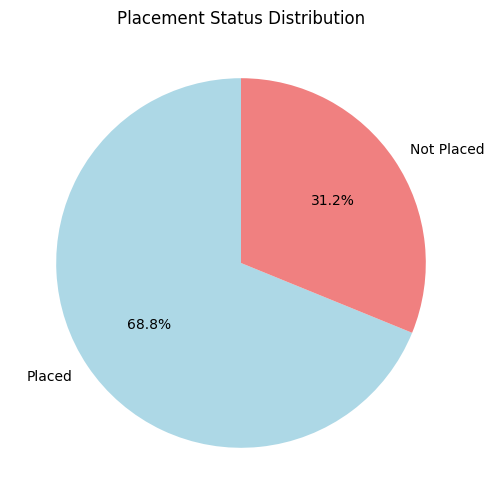

In [58]:
plt.figure(figsize=(10, 6))
status_counts = pl_df['status'].value_counts()
labels = ['Placed', 'Not Placed']
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # explode the 1st slice (i.e., 'Placed')

plt.pie(status_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Placement Status Distribution')
plt.show()

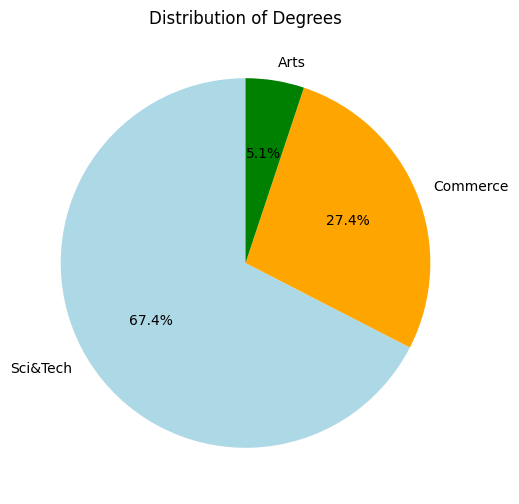

In [59]:
# Plotting a pie chart
plt.figure(figsize=(10, 6))
degree_counts = pl_df['degree_t'].value_counts()
labels = ['Sci&Tech', 'Commerce', 'Arts']
colors = ['lightblue', 'orange', 'green']

plt.pie(degree_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Degrees')
plt.show()

<Figure size 1500x1500 with 0 Axes>

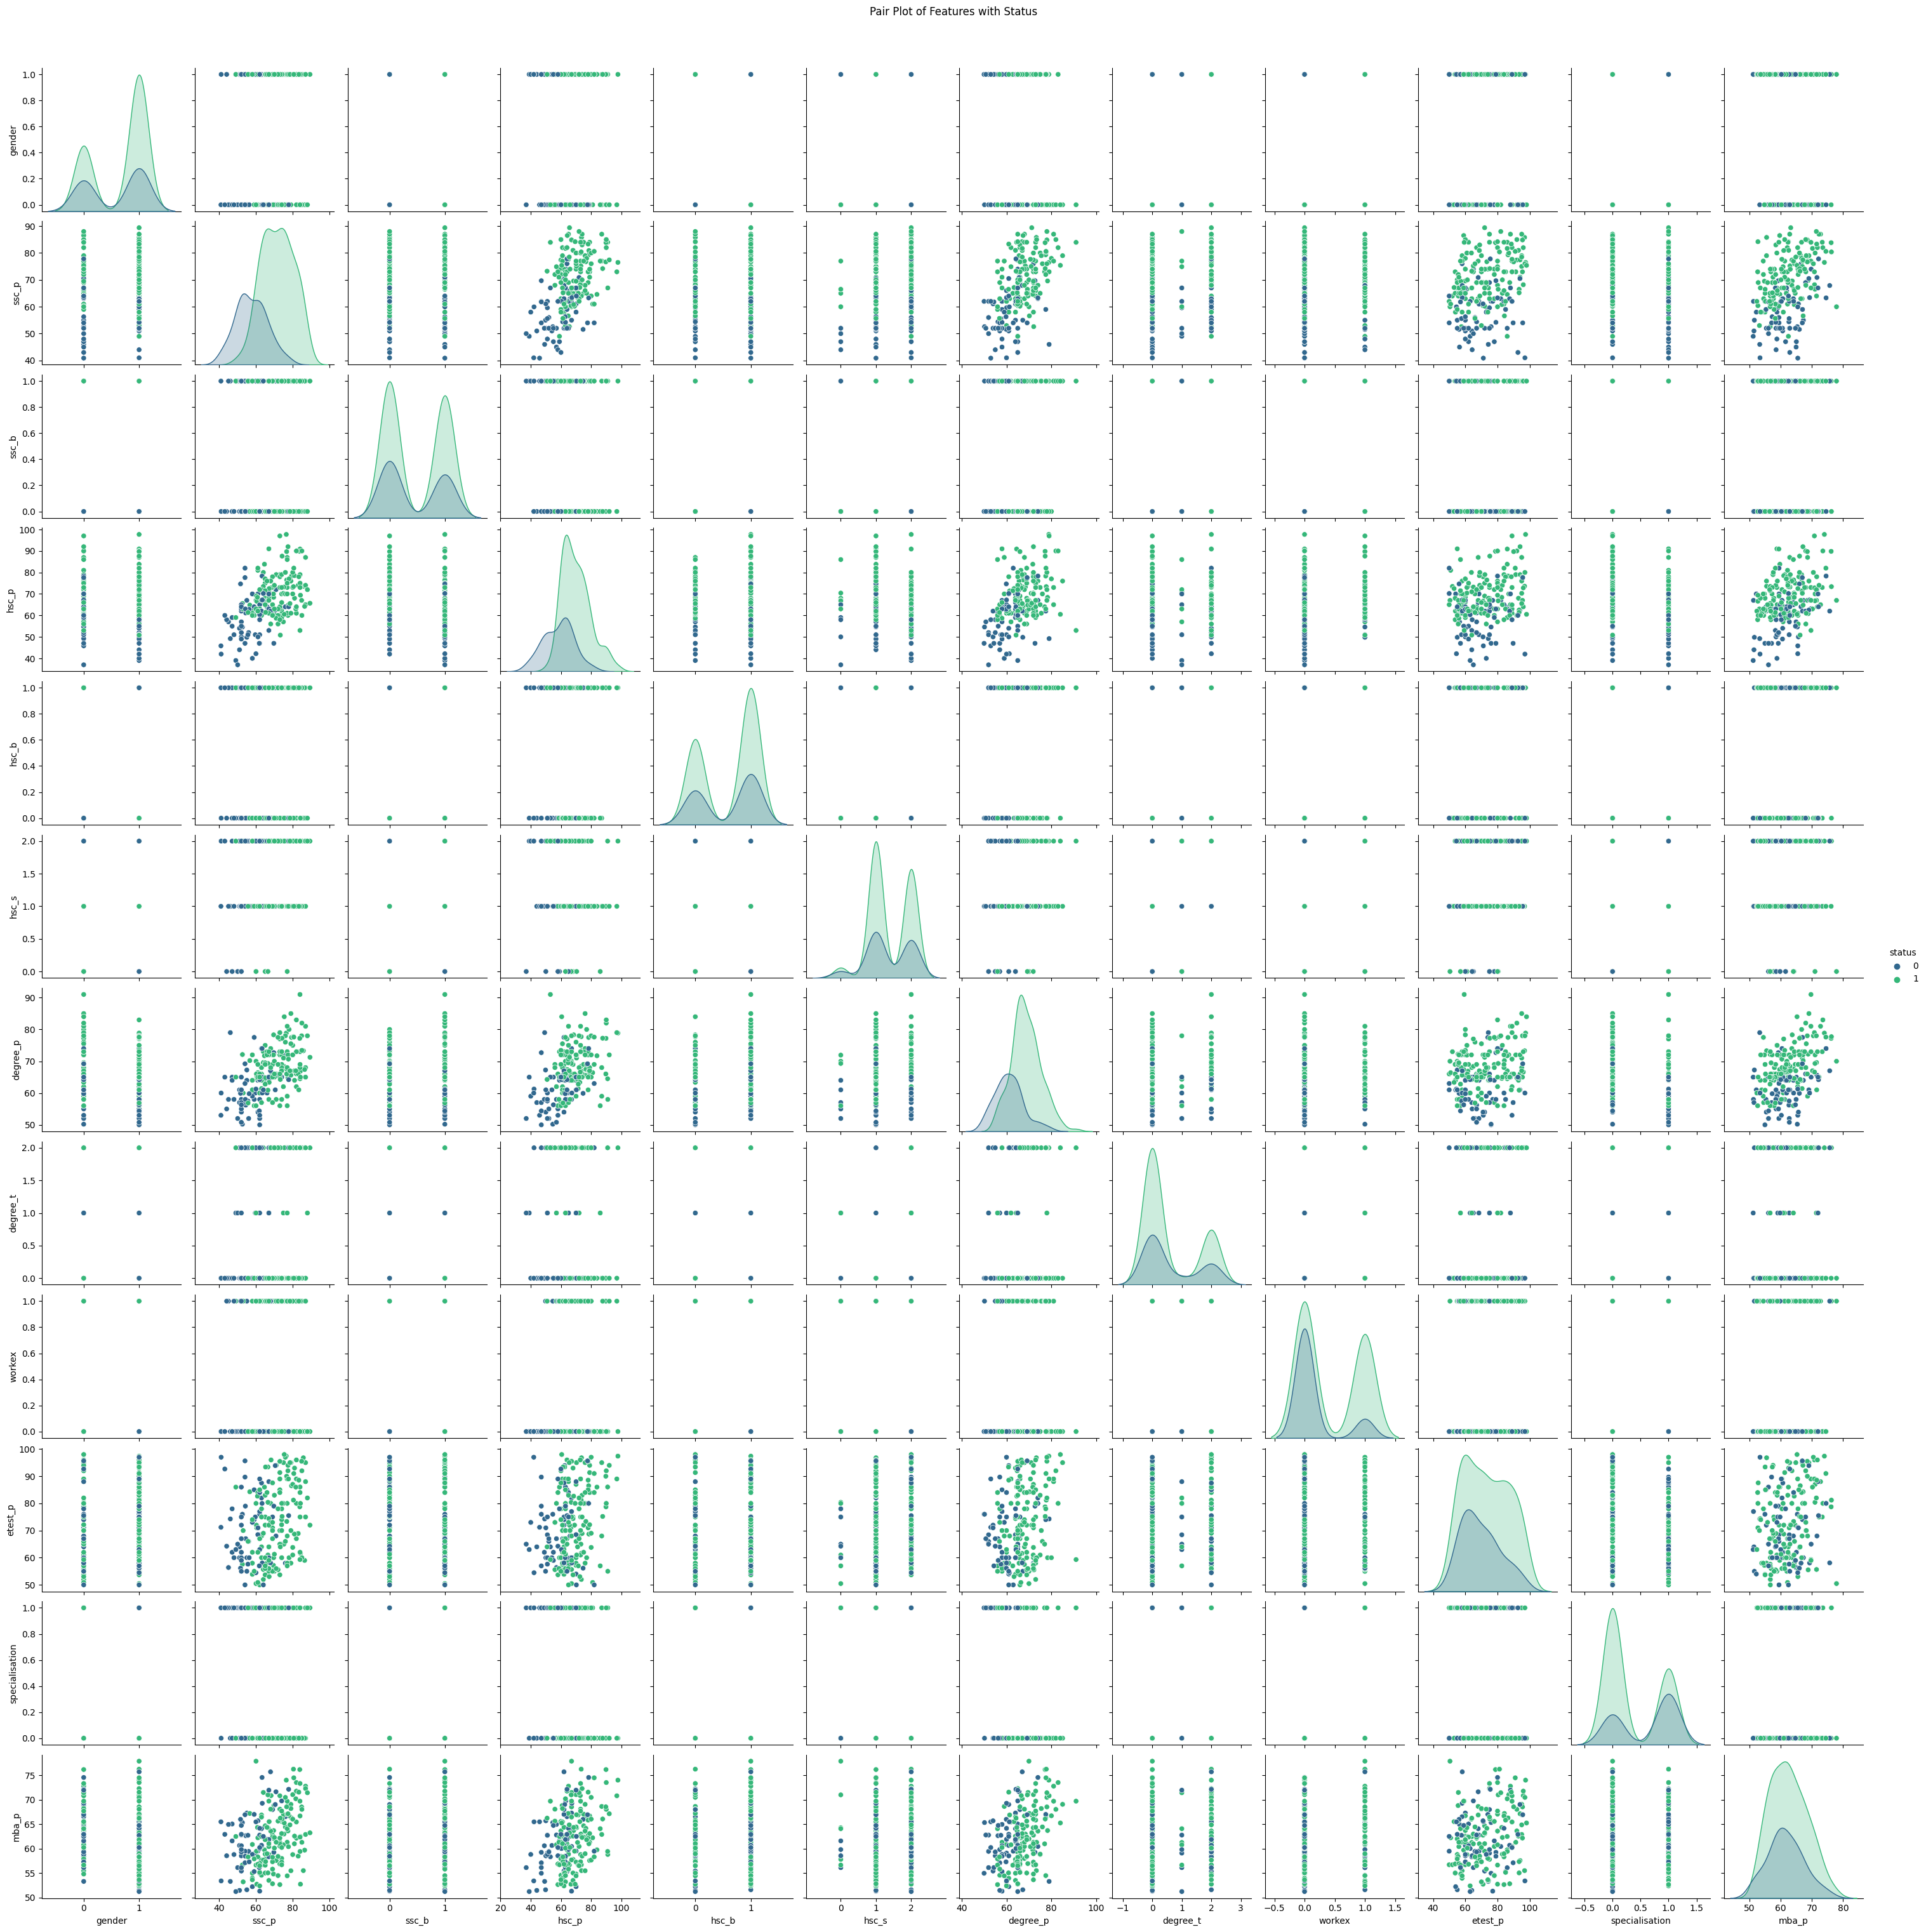

In [60]:
# Pair plot
plt.figure(figsize=(15, 15))
sb.pairplot(pl_df, hue='status', palette='viridis')
plt.suptitle('Pair Plot of Features with Status', y=1.02)
plt.show()

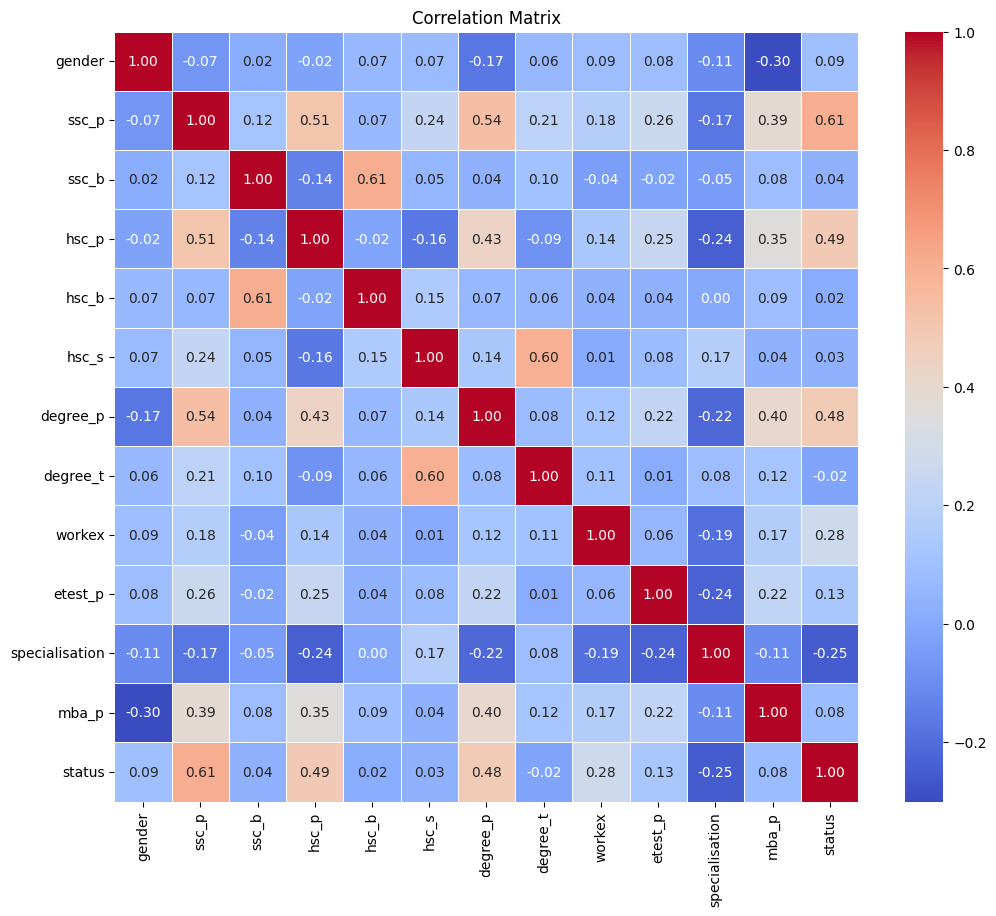

In [61]:
# Calculate the correlation matrix
correlation_matrix = pl_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap using seaborn
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Set the title of the plot
plt.title('Correlation Matrix')

# Show the plot
plt.show()

In [62]:
# Train-test split
X = pl_df.drop(['status'], axis=1)
Y = pl_df['status']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.25, random_state=42)

In [63]:
# Logistic Regression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [64]:
pred_test = logreg.predict(X_test)

In [65]:
print("Logistic Regression Results:")
print("Test confusion matrix:\n", confusion_matrix(pred_test, y_test))
print("Accuracy:", accuracy_score(y_test, pred_test) * 100)
print("Precision:", precision_score(y_test, pred_test) * 100)
print("Recall:", recall_score(y_test, pred_test) * 100)

Logistic Regression Results:
Test confusion matrix:
 [[11  1]
 [ 3 39]]
Accuracy: 92.5925925925926
Precision: 92.85714285714286
Recall: 97.5


In [66]:
# KNN Classifier
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [67]:
y_pred = classifier.predict(X_test)

In [68]:
print("\nKNN Classifier Results:")
print("Test confusion matrix:\n", confusion_matrix(y_pred, y_test))
print("Accuracy:", accuracy_score(y_test, y_pred) * 100)
print("Precision:", precision_score(y_test, y_pred) * 100)
print("Recall:", recall_score(y_test, y_pred) * 100)


KNN Classifier Results:
Test confusion matrix:
 [[ 5  3]
 [ 9 37]]
Accuracy: 77.77777777777779
Precision: 80.43478260869566
Recall: 92.5


In [69]:
# SVM Classifier
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [70]:
svc_pred = svc.predict(X_test)

In [71]:
print("\nSVM Classifier Results:")
print("Test confusion matrix:\n", confusion_matrix(svc_pred, y_test))
print("Accuracy:", accuracy_score(y_test, svc_pred) * 100)
print("Precision:", precision_score(y_test, svc_pred) * 100)
print("Recall:", recall_score(y_test, svc_pred) * 100)


SVM Classifier Results:
Test confusion matrix:
 [[ 5  2]
 [ 9 38]]
Accuracy: 79.62962962962963
Precision: 80.85106382978722
Recall: 95.0


In [73]:
classifiers = {
    'Logistic Regression': LogisticRegression(solver='liblinear'),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=8),
    'Support Vector Machine': SVC()
}
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': []}

In [74]:
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100

    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)

    print(f"{name} - Accuracy: {accuracy:.2f}%, Precision: {precision:.2f}%, Recall: {recall:.2f}%")

Logistic Regression - Accuracy: 92.59%, Precision: 92.86%, Recall: 97.50%
K-Nearest Neighbors - Accuracy: 77.78%, Precision: 80.43%, Recall: 92.50%
Support Vector Machine - Accuracy: 79.63%, Precision: 80.85%, Recall: 95.00%


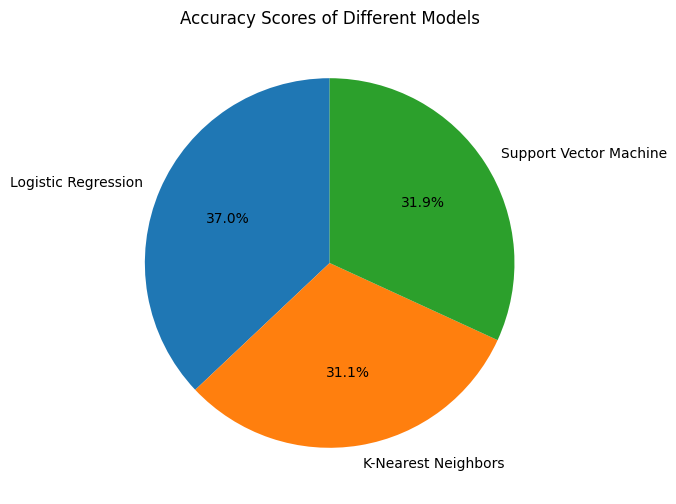

In [75]:
# Pie chart for accuracy scores
plt.figure(figsize=(10, 6))
plt.pie(results['Accuracy'], labels=results['Model'], autopct='%1.1f%%', startangle=90)
plt.title('Accuracy Scores of Different Models')
plt.show()